In [2]:
import numpy as np
from scipy.fftpack import fft, ifft, fftfreq
import matplotlib.pyplot as plt

<h1>TASK1</h1>


<p>На вход передатчика подается сигнал косинуса с частотами 50, 150 и 450 Гц. Определите спектр
сигнала с помощью стандартной функции быстрого преобразования Фурье.</p>

Text(0, 0.5, 'Амплитуда')

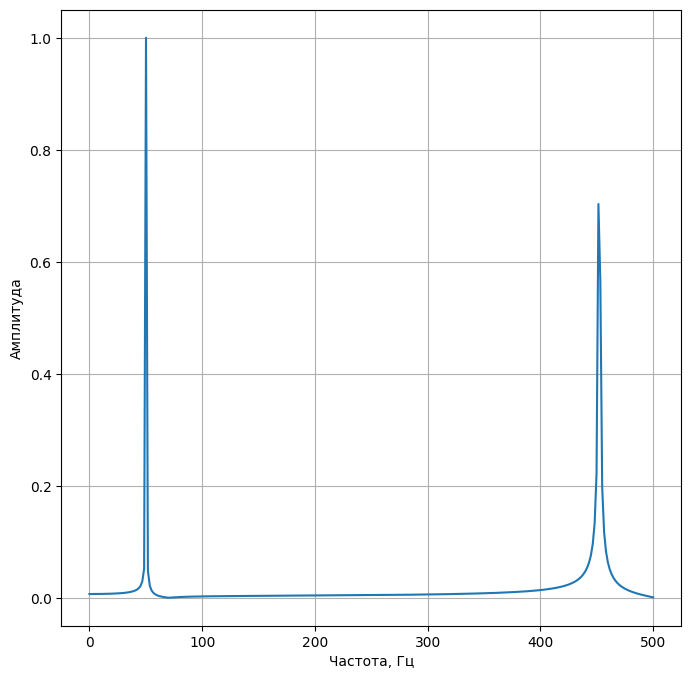

In [3]:
N = 600 # Количество отсчетов
fmax=1000 # максимальная частота
T = 1.0/fmax #
f=50 # частота сигнала в Гц
x = np.linspace(0.0, N*T, N)
y = np.cos(f * 2.0*np.pi*x) + 0*np.cos(3*f * 2.0*np.pi*x) + np.cos(9*f * 2.0*np.pi*x)#
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

<h1>TASK2</h1>

<p>Построить фильтр Баттерворта нижних частот 2-го порядка (ФНЧ) к сигналу, убедиться, что
происходит подавление высоких частот сигнала 150 и 450 Гц. При моделировании ФНЧ
воспользоваться формулой (32). Частоту среза фильтра Баттерворта подберите самостоятельно.
В данном примере частота среза может варьироваться в диапазоне от 70 до 120 Гц.

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтра
Баттерворта. Убедитесь, что амплитуда исходного сигнала только для частоты 50 Гц будет
совпадать с амплитудой отфильтрованного сина рис 1.ФНЧ.</p>

In [4]:
def filter2(w,wc):
    flt = (wc**2)/(-w**2 + 1j*np.sqrt(2)*wc*w + wc**2)
    return flt    

Text(0, 0.5, 'Амплитуда')

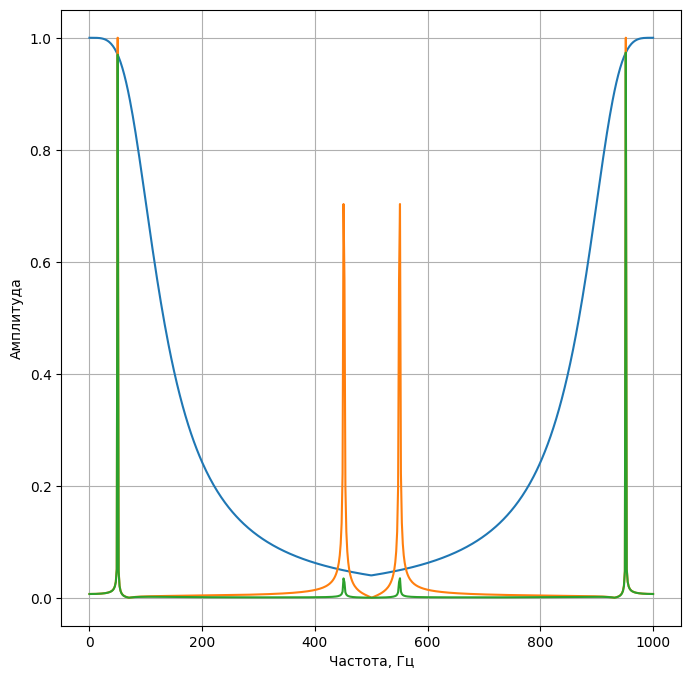

In [45]:
flt = np.vectorize(filter2)

N = 600 # Количество отсчетов
fmax=1000 # максимальная частота
T = 1.0/fmax #
f=50 # частота сигнала в Гц

x = np.linspace(0.0, N*T, N)
y = (np.cos(f * 2.0*np.pi*x) + 0*np.cos(3*f * 2.0*np.pi*x) + np.cos(9*f * 2.0*np.pi*x)) 

xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)

fig = plt.figure(figsize=(8,8)) # размер полотна
yf = flt(xf,100)
yf2 = np.flip(yf)

yfc = np.concatenate((yf, yf2), axis=None)
xf = np.linspace(0.0, fmax, N)
plt.plot(xf, np.abs(yfc))
plt.plot(xf, 2.0/N * np.abs(yff) )
plt.plot(xf, 2.0/N * np.abs(yff) * np.abs(yfc))

plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

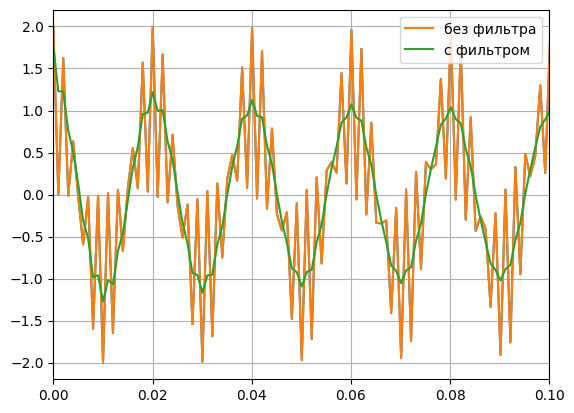

In [46]:
# x = np.linspace(0.0, N*T, N)
yfff = ifft(yff)

yf = np.abs(yff) * np.abs(yfc)
yflt = ifft(yf)

plt.plot(x,y)
plt.plot(x, yfff, label= 'без фильтра')
plt.plot(x, yflt, label= 'с фильтром')
plt.xlim(0, 0.1)
plt.legend()
plt.grid()

<h1>TASK3</h1>

<p>Построить фильтр высоких частот (ФВЧ) к сигналу, убедиться, что происходит
подавление низких частот сигнала (50 и 150 Гц), воспользовавшись формулой (35).

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтра
ФНЧ.
</p>

In [8]:
def filter3(w,wc):
    flt = (w**2)/(-wc**2 + 1j*np.sqrt(2)*wc*w + w**2)
    return flt    

Text(0, 0.5, 'Амплитуда')

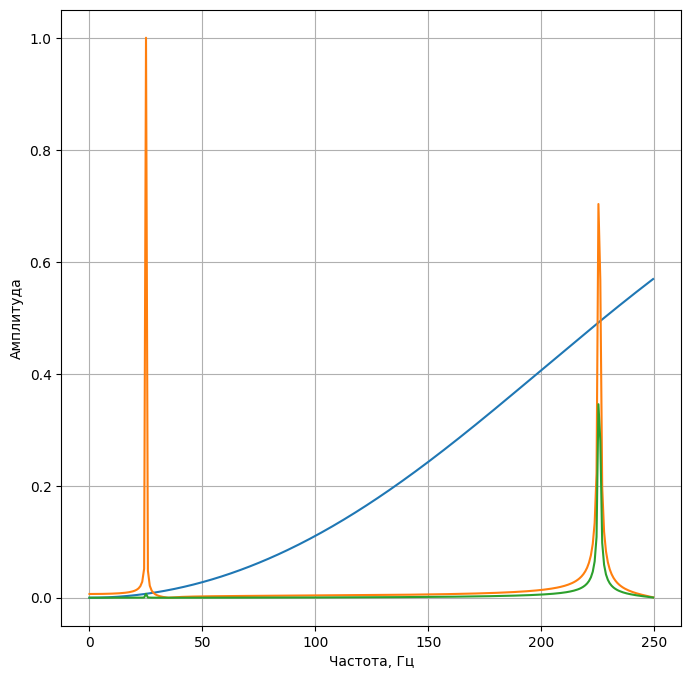

In [12]:
flt = np.vectorize(filter3)

N = 600 # Количество отсчетов
fmax=1000 # максимальная частота
T = 1.0/fmax #
f=50 # частота сигнала в Гц

x = np.linspace(0.0, N*T, N)
y = (np.cos(f * 2.0*np.pi*x) + 0* np.cos(3*f * 2.0*np.pi*x) + np.cos(9*f * 2.0*np.pi*x)) 

xf = np.linspace(0.0, fmax/2, N)
yff = fft(y)

fig = plt.figure(figsize=(8,8)) # размер полотна
yf = flt(xf,300)

plt.plot(xf[0:N//2], np.abs(yf[0:N//2]))
plt.plot(xf[0:N//2], 2.0/N * np.abs(yff[0:N//2]) )
plt.plot(xf[0:N//2], 2.0/N * np.abs(yff[0:N//2]) * np.abs(flt(xf,300)[0:N//2]))

plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

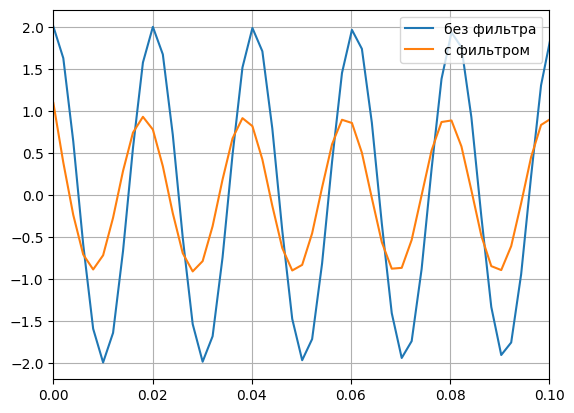

In [20]:
x = np.linspace(0.0, N*T, N//2)
yfff = ifft(yff[0:N//2])

yf = yff * flt(xf,100)
yflt = ifft(yf[0:N//2])

plt.plot(x, yfff, label= 'без фильтра')
plt.plot(x, yflt, label= 'с фильтром')
plt.xlim(0, 0.1)
plt.legend()
plt.grid()

<h1>TASK4</h1>

<p>Построить полосовой фильтр и заграждающий фильтр (ПФ/ЗФ) настроенный на частоту
150Гц. При моделировании использовать формулы (36) и (37).

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтров
ПФ/ЗФ.</p>

In [84]:
def filter4P(w,wc):
    flt = filter2(w,wc) * filter3(w,wc)
    return flt    

def filter4Z(w,wc):
    s = 1/wc + 1j*w/wc
    b = (wc+30)-(wc-30)
    w0 = np.sqrt((wc+30)*(wc-30))
    O = b*s/(s**2+w0**2)
    flt = 1/(O**2 + np.sqrt(2)*O + 1)
    return flt    


Text(0, 0.5, 'Амплитуда')

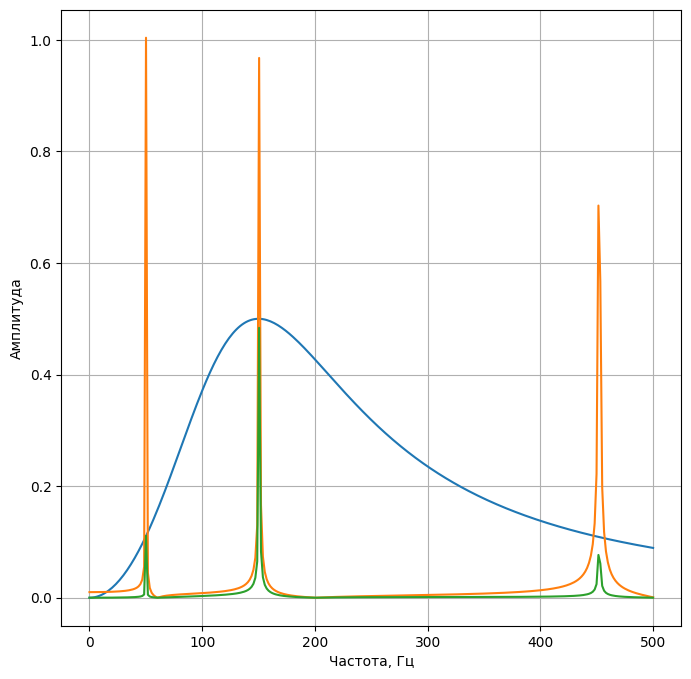

In [89]:
fltp = np.vectorize(filter4P)
fltz = np.vectorize(filter4Z)

N = 600 # Количество отсчетов
fmax=1000 # максимальная частота
T = 1.0/fmax #
f=50 # частота сигнала в Гц

x = np.linspace(0.0, N*T, N)
y = (np.cos(f * 2.0*np.pi*x) + np.cos(3*f * 2.0*np.pi*x) + np.cos(9*f * 2.0*np.pi*x)) 

xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)

fig = plt.figure(figsize=(8,8)) # размер полотна
yf = fltp(xf,150)

plt.plot(xf, np.abs(yf))
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]) )
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]) * np.abs(fltp(xf,150)))

plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

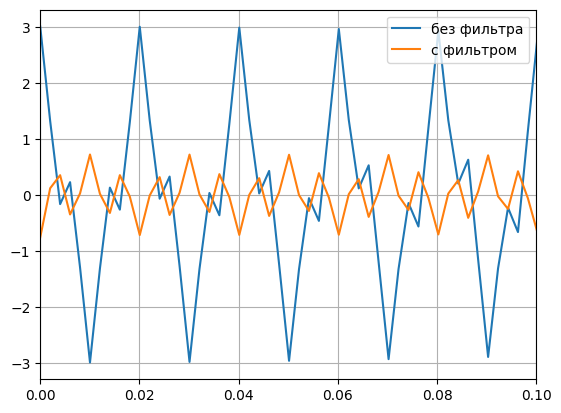

In [91]:
x = np.linspace(0.0, N*T, N//2)
yfff = ifft(yff[0:N//2])

yf = yff[0:N//2] * fltp(xf,150)
yflt = ifft(yf)

plt.plot(x, yfff, label= 'без фильтра')
plt.plot(x, yflt, label= 'с фильтром')
plt.xlim(0, 0.1)
plt.legend()
plt.grid()

Text(0, 0.5, 'Амплитуда')

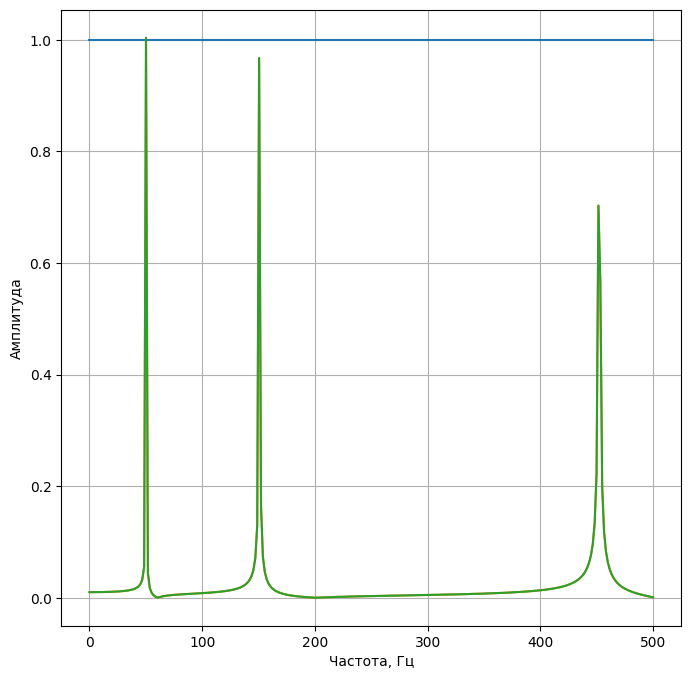

In [92]:
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)

fig = plt.figure(figsize=(8,8)) # размер полотна
yf = fltz(xf,150)

plt.plot(xf, np.abs(yf))
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]) )
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]) * np.abs(fltz(xf,150)))

plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

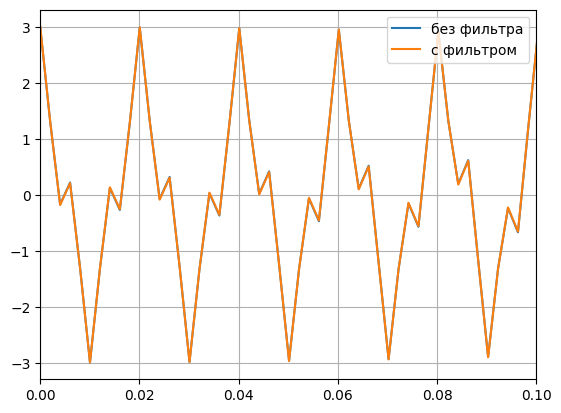

In [93]:
x = np.linspace(0.0, N*T, N//2)
yfff = ifft(yff[0:N//2])

yf = yff[0:N//2] * fltz(xf,150)
yflt = ifft(yf)

plt.plot(x, yfff, label= 'без фильтра')
plt.plot(x, yflt, label= 'с фильтром')
plt.xlim(0, 0.1)
plt.legend()
plt.grid()

<h1>TASK5</h1>

<p>Согласно формулам (28, 29) возможно построить фильтр Баттерворта любого порядка.
Постройте фильтр Баттерворта 3-го и 4-го порядка с автоматическим определением полюсов
фильтра. Реализуйте пунк2 1 данной лабораторной для Фильтра Баттерворта 4-го порядка.

примеч.: Полюсы передаточной функции обладают симметрией, а именно их число и
конфигурация расположения в обеих полуплоскостях одинаковы. При этом физически
реализуемому фильтру отвечают только полюсы, расположенные в левой полуплоскости.</p>

In [13]:
def filter5_3(w,wc):
    s = 1/wc + 1j*w/wc
    S1 = np.exp(1j * 2*np.pi/3)
    S2 = np.exp(1j * 4*np.pi/3)
    S3 = -1
    S4 = np.exp(1j * np.pi/3)
    S5 = np.exp(1j * 5*np.pi/3)
    S6 = 1
    flt = 1/((s-S1)*(s-S2)*(s-S3)*(s-S4)*(s-S5)*(s-S6))
    return flt    

def filter5_4(w,wc):
    s = 1/wc + 1j*w/wc
    S1 = np.exp(1j * np.pi/8)
    S2 = np.exp(1j * 3*np.pi/8)
    S3 = np.exp(1j * 5*np.pi/8)
    S4 = np.exp(1j * 7*np.pi/8)
    S5 = np.exp(1j * 9*np.pi/8)
    S6 = np.exp(1j * 11*np.pi/8)
    S7 = np.exp(1j * 13*np.pi/8)
    S8 = np.exp(1j * 15*np.pi/8)
    flt = 1/((s-S1)*(s-S2)*(s-S3)*(s-S4)*(s-S5)*(s-S6)*(s-S7)*(s-S8))
    return flt   

Text(0, 0.5, 'Амплитуда')

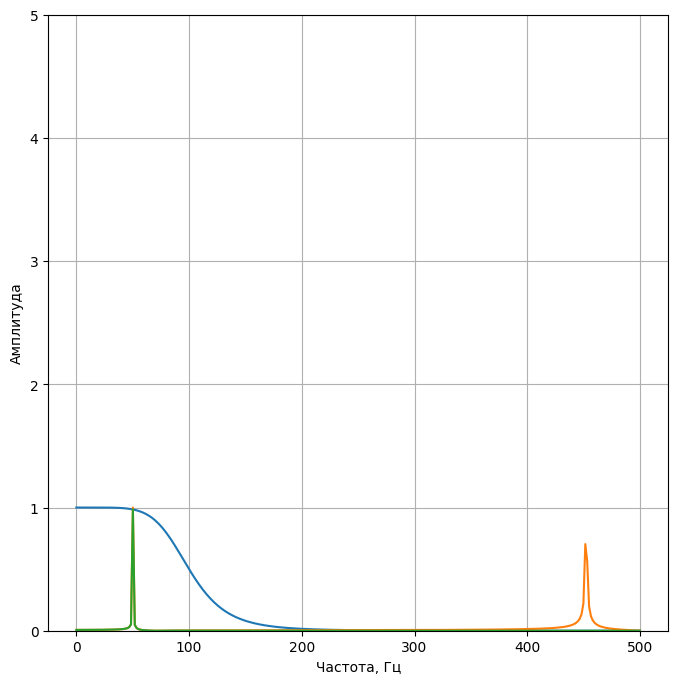

In [14]:
flt = np.vectorize(filter5_3)

N = 600 # Количество отсчетов
fmax=1000 # максимальная частота
T = 1.0/fmax #
f=50 # частота сигнала в Гц

x = np.linspace(0.0, N*T, N)
y = (np.cos(f * 2.0*np.pi*x) + 0 * np.cos(3*f * 2.0*np.pi*x) + np.cos(9*f * 2.0*np.pi*x)) 

xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)

fig = plt.figure(figsize=(8,8)) # размер полотна
yf = flt(xf,100)

plt.plot(xf, np.abs(yf))
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]) )
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]) * np.abs(flt(xf,100)))
plt.ylim(0,5)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

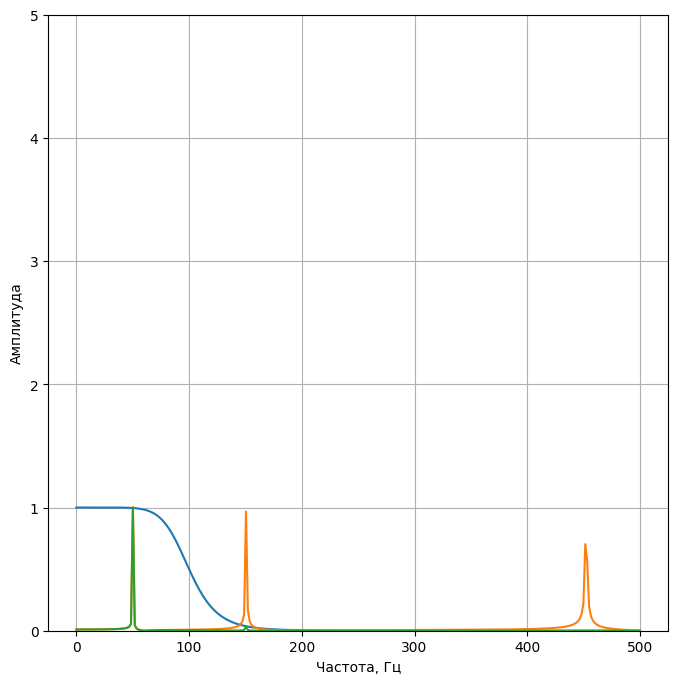

In [15]:
flt = np.vectorize(filter5_4)

N = 600 # Количество отсчетов
fmax=1000 # максимальная частота
T = 1.0/fmax #
f=50 # частота сигнала в Гц

x = np.linspace(0.0, N*T, N)
y = (np.cos(f * 2.0*np.pi*x) +  np.cos(3*f * 2.0*np.pi*x) + np.cos(9*f * 2.0*np.pi*x)) 

xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)

fig = plt.figure(figsize=(8,8)) # размер полотна
yf = flt(xf,100)

plt.plot(xf, np.abs(yf))
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]) )
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]) * np.abs(flt(xf,100)))
plt.ylim(0,5)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

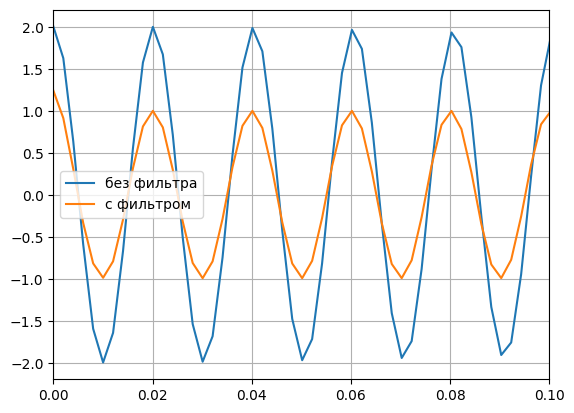

In [12]:
x = np.linspace(0.0, N*T, N//2)
yfff = ifft(yff[0:N//2])

yf = yff[0:N//2] * flt(xf,100)
yflt = ifft(yf)

plt.plot(x, yfff, label= 'без фильтра')
plt.plot(x, yflt, label= 'с фильтром')
plt.xlim(0, 0.1)
plt.legend()
plt.grid()

<h1>TASK6</h1>

<p>Попробуйте добавить шум к исходному сигналу, посмотрите как происходит фильтрация
для зашумленного сигнала.</p>

In [31]:
import random as rm
def noise(x):
    a = 2
    if rm.random() >= 0.5:
        return a*rm.random()
    else:
        return -a*rm.random() 


fnoise = np.vectorize(noise)

Text(0, 0.5, 'Амплитуда')

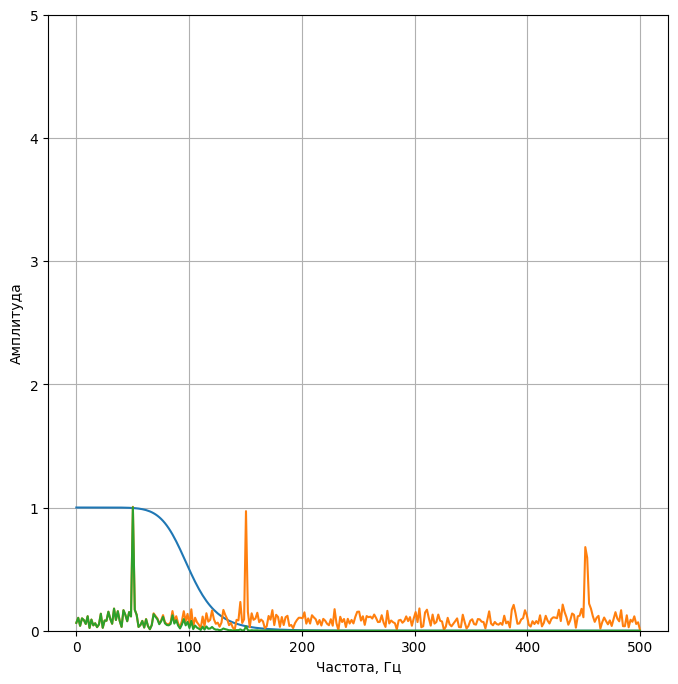

In [32]:
flt = np.vectorize(filter5_4)

N = 600 # Количество отсчетов
fmax=1000 # максимальная частота
T = 1.0/fmax #
f=50 # частота сигнала в Гц

x = np.linspace(0.0, N*T, N)
y = (np.cos(f * 2.0*np.pi*x) +  np.cos(3*f * 2.0*np.pi*x) + np.cos(9*f * 2.0*np.pi*x)) + fnoise(x)

xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)

fig = plt.figure(figsize=(8,8)) # размер полотна
yf = flt(xf,100)

plt.plot(xf, np.abs(yf))
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]) )
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]) * np.abs(flt(xf,100)))
plt.ylim(0,5)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

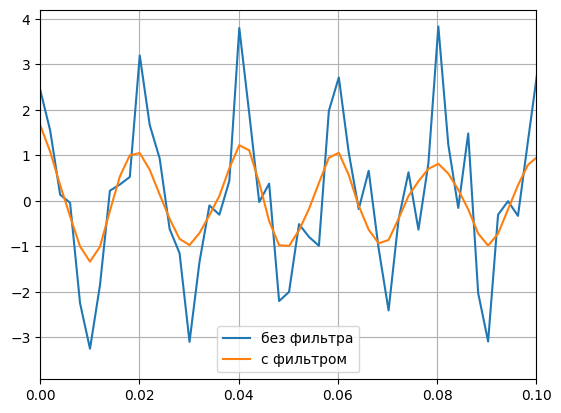

In [27]:
x = np.linspace(0.0, N*T, N//2)
yfff = ifft(yff[0:N//2])

yf = yff[0:N//2] * flt(xf,100)
yflt = ifft(yf)

plt.plot(x, yfff, label= 'без фильтра')
plt.plot(x, yflt, label= 'с фильтром')
plt.xlim(0, 0.1)
plt.legend()
plt.grid()